In [ ]:
from google.colab import drive
import sys, pandas
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthExpenditure.csv', skiprows=3)
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LifeExpectancy.csv', skiprows=3)

print("Health Expenditure Data:")
print(df1.head())

print("\nLife Expectancy Data:")
print(df2.head())

Health Expenditure Data:
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                          Indicator Name     Indicator Code  1960  1961  1962  \
0  Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   NaN   NaN   NaN   
1  Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   NaN   NaN   NaN   
2  Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   NaN   NaN   NaN   
3  Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   NaN   NaN   NaN   
4  Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   NaN   NaN   NaN   

   1963  1964  1965  ...       2015       2016       2017       2018  \
0   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
1   NaN   NaN   NaN  ...   5.997956   6.097888   5.968235   5

In [ ]:
# Data from the US and Bangladesh
countries = ["United States", "Bangladesh"]
df1 = df1[df1['Country Name'].isin(countries)]
df2 = df2[df2['Country Name'].isin(countries)]

In [ ]:
# Data from 2021
year = "2021"
df1 = df1[['Country Name', year]]
df2 = df2[['Country Name', year]]

In [ ]:
# Basic Statistics
df1 = df1.rename(columns={year: 'Health Expenditure (% of GDP)'})
df2 = df2.rename(columns={year: 'Life Expectancy (Years)'})

df_combined = pd.merge(df1, df2, on='Country Name')
print(df_combined)

print("\nBasic Statistics:")
df_combined.describe()

    Country Name  Health Expenditure (% of GDP)  Life Expectancy (Years)
0     Bangladesh                       2.364930                72.381000
1  United States                      17.362568                76.329268

Basic Statistics:


,Health Expenditure (% of GDP),Life Expectancy (Years)
count,2.000000,2.000000
mean,9.863749,74.355134
std,10.604932,2.791847
min,2.364930,72.381000
25%,6.114339,73.368067
50%,9.863749,74.355134
75%,13.613158,75.342201
max,17.362568,76.329268


In [ ]:
# Missing values
print("Missing Values in Health Expenditure:")
print(df1.isnull().sum())

print("\nMissing Values in Life Expectancy:")
print(df2.isnull().sum())

Missing Values in Health Expenditure:
Country Name                     0
Health Expenditure (% of GDP)    0
dtype: int64

Missing Values in Life Expectancy:
Country Name               0
Life Expectancy (Years)    0
dtype: int64


In [ ]:
# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

df1 = df_combined['Health Expenditure (% of GDP)']
df2 = df_combined['Life Expectancy (Years)']

print(f"Skewness of Health Expenditure: {skew(df1)}")
print(f"Kurtosis of Health Expenditure: {kurtosis(df1)}")

print(f"\nSkewness of Life Expectancy: {skew(df2)}")
print(f"Kurtosis of Life Expectancy: {kurtosis(df2)}")

Skewness of Health Expenditure: -1.348036272941225e-16
Kurtosis of Health Expenditure: -2.0

Skewness of Life Expectancy: 1.0793985893165974e-14
Kurtosis of Life Expectancy: -2.0


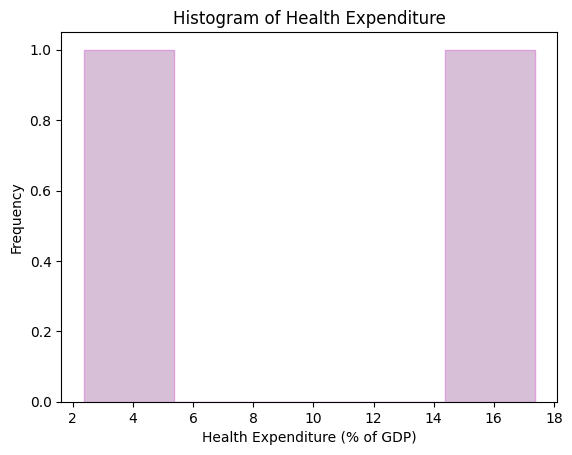

In [ ]:
# Histogram
import matplotlib.pyplot as plt

plt.hist(df1, bins=5, color='thistle', edgecolor='plum')
plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Frequency')
plt.title('Histogram of Health Expenditure')
plt.show()

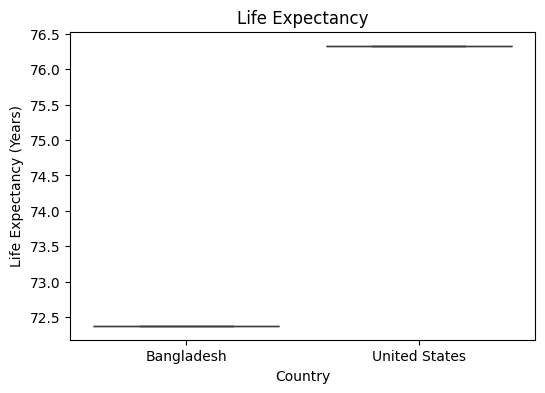

In [ ]:
# Multiple Box Plots
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x='Country Name', y='Life Expectancy (Years)', data=df_combined)
plt.xlabel('Country')
plt.ylabel('Life Expectancy (Years)')
plt.title('Life Expectancy')
plt.show()

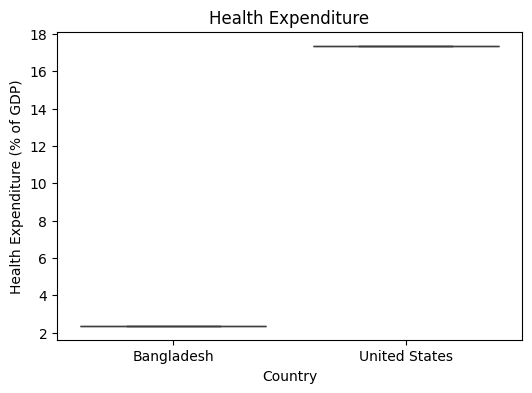

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Country Name', y='Health Expenditure (% of GDP)', data=df_combined)
plt.xlabel('Country')
plt.ylabel('Health Expenditure (% of GDP)')
plt.title('Health Expenditure')
plt.show()